<a href="https://www.nlpfromscratch.com?utm_source=notebook&utm_medium=nb-header"><center><img src="https://github.com/nlpfromscratch/webinars/blob/main/assets/banner.png?raw=1"></center></a>

Copyright, NLP from scratch, 2024.

[nlpfromscratch.com](https://www.nlpfromscratch.com)

------------

# Hands-on Hugging Face 🤗

Saturday, December 14th, 2024  
9:30 - 11:30 AM  
Toronto Public Library - Northern District Branch  
[40 Orchard View Boulevard,
Toronto, ON M4R 1B9](https://maps.app.goo.gl/Nu6Kwbp6qsYTsFtJ8)

Myles Harrison  
myles@nlpfromscratch.com

## Introduction 🎬
In this notebook, we will see several different applications of Large Language Models (LLMs), and show how they can be leveraged the open source libraries from [Hugging Face](https://huggingface.co/).

This notebook is best run in [Google Colab](https://colab.research.google.com/), where the majority of dependencies are already installed. However, if you wish to run the notebook locally, please follow the [directions for setting up a local environment](https://drive.google.com/file/d/1EV1seK-dUHRCzj2EDuu3ETAhUyjzOGRd/view?usp=drive_link) and you may then download the notebook as a `.ipynb` and run in either Jupyter or Jupyterlab.

Though Google Colab comes with many useful data science libraries included by default (including Pytorch), the Hugging Face libraries are not, so we will first install those here using `pip`, as they will be used in the remainder of the notebook.

- The `transformers` library, for general usage of transformer models
- The `datasets` library, for working with datasets hosted on Hugging Face
- The `diffusers` library, for working with diffusion models for image generation
- The `accelerate` library, for using GPU for inference

In [ ]:
!pip install transformers datasets diffusers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


## Generating Text: Working with GPT ✍

One of the most well-known transformer models for text generation is that of the Generative Pre-trained Transformer ([GPT](https://en.wikipedia.org/wiki/Generative_pre-trained_transformer)) family of models, made famous by [OpenAI](https://openai.com/).

The first GPT model was released in 2018 and subsequent models, GPT-2 and GPT-3 released in 2019 and 2020, each larger in the number of parameters from the proceeding by a factor of ~10x. GPT-3 was the precursor to InstructGPT, from which OpenAI created the immensely popular and disruptive ChatGPT. GPT-4 was released in March of 2023 and has around 1.8T parameters and represents the current state-of-the-art in LLMs.

The model weights for GPT-3 onward have not been released and are proprietary, but those for GPT-2 are publicly available. Due to computational constraints (even with GPU), here we will work with a much smaller GPT-2 model of only ~124M parameters.

With only a few lines of code, we can download the model from the Hugging Face platform, instantiate it in a [pipeline](https://huggingface.co/docs/transformers/main_classes/pipelines), and then generate text based on an input string:

In [ ]:
from transformers import pipeline

# Input string to generate from
input_string = "The rain in Spain falls mainly in the plain, and furthermore"

# Create the pipeline for text generation, specify device=0 to use GPU / CUDA
generator = pipeline('text-generation', model='gpt2', device=0)

# Create 3 output generations
outputs = generator(input_string, max_length=40, num_return_sequences=3)

# Display the first output
print(outputs)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[{'generated_text': 'The rain in Spain falls mainly in the plain, and furthermore the rains are more frequent in the areas with little wind, which is why they usually have a few more days a year in which to leave'}, {'generated_text': 'The rain in Spain falls mainly in the plain, and furthermore the rain comes largely from the coast or the coasts of Spain, the Mediterranean. In 1843 the total rainfall was about 30 g/m'}, {'generated_text': 'The rain in Spain falls mainly in the plain, and furthermore, the high rate of precipitation occurs almost exclusively in the northern part of the country. The only exception, while it is unlikely that Spanish rainfall'}]


In [ ]:
f"{generator.model.num_parameters():,}"

'124,439,808'

We can see that even though this is the smallest GPT-2 model available on Hugging Face, it still weighs in at just over half a gigabyte. The full GPT-2 model, [GPT2-XL](https://huggingface.co/gpt2-xl) is ~6.5 GB!

Now that we've generated some text, let's use the `Markdown` class from IPython to generate the outputs as markdown and display in-line in the notebook:

In [ ]:
# Display the outputs nicely
from IPython.display import Markdown

for output in outputs:
  display(Markdown(output['generated_text']))

The rain in Spain falls mainly in the plain, and furthermore the rains are more frequent in the areas with little wind, which is why they usually have a few more days a year in which to leave

The rain in Spain falls mainly in the plain, and furthermore the rain comes largely from the coast or the coasts of Spain, the Mediterranean. In 1843 the total rainfall was about 30 g/m

The rain in Spain falls mainly in the plain, and furthermore, the high rate of precipitation occurs almost exclusively in the northern part of the country. The only exception, while it is unlikely that Spanish rainfall

## Working with a Chat-style model: LLaMA 3.2

Now that we have worked with a basic generative text model, we will move on to working with a modern LLM with a "chat" style model. In this section we will use LLaMA 3.2, from Meta's incredibly popular open source [LLaMA](https://www.llama.com/) series of models.

A chat-style model (or "instruct" model as they are also referred to, as they receive instructions from the user) actually functions exactly the same as a regular generative text model such as GPT-2, the only difference is in the training data and the way the model outputs are displayed.

The models were trained on JSON which contain conversations, with three different roles:
- The **user** role: This is us, or the person talking to the chat bot.
- The **assistant** role: These are the responses from the model.
- The **system** role: This is a role that dictates the overall behavior of the model and style of its responses.

So, in a way, an chat-style model is not actually responding, but applying the "autcomplete on steroids" of regular generative text models, just in this case autcompleting a conversation, and we are only show the responses from the *assistant* role, and we provide the responses for the *user* role.

Let's see this in action with LLaMA 3.2. Unfortunately, using the LLaMA series of models from the [official Hugging Face repos](https://huggingface.co/meta-llama) requires accepting a [license](https://huggingface.co/meta-llama/Llama-3.2-1B/blob/main/LICENSE.txt) and user agreement, which therefore means they cannot be used anonymously (*i.e.* without a HF account).

Fortunately, a copy of 1B parameter version of LLaMA-3.2-Instruct is provided by Unsloth in their repo at https://huggingface.co/unsloth/Llama-3.2-1B-Instruct.

Let's test it out using a `pipeline`. Here the model is trained differently, so we have to provide the text in the JSON format it expects with *system* and *user* roles:

In [ ]:
import torch
device = "cuda"
llama_32 = "unsloth/Llama-3.2-1B-Instruct"

prompt = [
    {"role": "system", "content": "You are a helpful assistant, that responds as a pirate."},
    {"role": "user", "content": "Write a poem about applesauce."},
]

generator = pipeline(model=llama_32, device=device, torch_dtype=torch.bfloat16)
generation = generator(
    prompt,
    do_sample=False,
    temperature=1.0,
    top_p=1,
    max_new_tokens=1000
)

print(f"Generation: {generation[0]['generated_text']}")

config.json:   0%|          | 0.00/927 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/54.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

Generation: [{'role': 'system', 'content': 'You are a helpful assistant, that responds as a pirate.'}, {'role': 'user', 'content': 'Write a poem about applesauce.'}, {'role': 'assistant', 'content': "Yer lookin' fer a poem about applesauce, eh?\n\nOh, applesauce, sweet and fine,\nA treasure from the orchard's vine.\nIn jars or pouches, ye be stored,\nA treasure fer young and old.\n\nMe mouth waters at the thought o' thee,\nA taste o' autumn, wild and free.\nNo need fer sugar, no need fer spice,\nJust applesauce, a simple, sweet device.\n\nIn the morning, on yer toast ye go,\nA healthy start, don't ye know?\nOr on yer oatmeal, a tasty treat,\nApplesauce, a snack to repeat.\n\nSo here's to applesauce, me hearty friend,\nA treasure that never doth end.\nMay yer spoon be filled, and yer belly be full,\nOf applesauce, the treasure that's worth the pull!"}]


Now to get the model response, we just print the generated text for the *assistant* role - the 3rd element in the array:

In [ ]:
display(Markdown(generation[0]['generated_text'][2]['content']))

Yer lookin' fer a poem about applesauce, eh?

Oh, applesauce, sweet and fine,
A treasure from the orchard's vine.
In jars or pouches, ye be stored,
A treasure fer young and old.

Me mouth waters at the thought o' thee,
A taste o' autumn, wild and free.
No need fer sugar, no need fer spice,
Just applesauce, a simple, sweet device.

In the morning, on yer toast ye go,
A healthy start, don't ye know?
Or on yer oatmeal, a tasty treat,
Applesauce, a snack to repeat.

So here's to applesauce, me hearty friend,
A treasure that never doth end.
May yer spoon be filled, and yer belly be full,
Of applesauce, the treasure that's worth the pull!

Here we have only seen a single input and response from the model, but this is, in principle how chat-based applications like ChatGPT work.

## Exercise: Generating Text with LLaMA-3.2-1B and exploring the `temperature`

Great! It's easy to generate text and work with a state-of-the-art open source LLM with minimal coding required 🙌

One of the parameters that the different model in Hugging Face accept during generation is called the `temperature` parameter. For LLaMA 3.2, this value ranges from 0 to 2. Let's explore this parameter using our pipeline with the LLaMA 3.2 to generate different outputs with the same prompt.

1. Write a new prompt for the model and generate the output using the pipeline. Print or display the result using `print()` or `display(Markdown())`
2. Try the same prompt for different values of the `temperature` parameter. Try a temperatures of `temperature=1E-16` and to 2.0 (*e.g.* `temperature=2.0`). Run the code cells multiple times. What do you notice is different? (Note to have the `temperature` parameter take effect, we also need to set the `do_sample` parameter to `True`).
3. Now try a very large value for temperature (*e.g.* 1E200)
4. Given the above, what do you think the temperature parameter controls?

In [ ]:
#### YOUR ANSWER HERE







In [ ]:
# Before entering the next section, run this code to free up memory
import gc
import torch

del generator

gc.collect()
torch.cuda.empty_cache()

## Stable Diffusion and Generating Synthetic Images 🎨

We can also programmatically generate synthetic media using multimodal NLP and the power of Large Language Models (LLMs). [Stable Diffusion](https://en.wikipedia.org/wiki/Stable_Diffusion) is a very popular series of text-to-image models for this purpose which was released publicly by [Stability AI](https://stability.ai/) in August of 2022. Stable Diffusion is not a transformer architecture (and so some would say is not technically an LLM), though there are other cutting-edge image generation models based on the transformer architecture such as OpenAI's [DALL-E](https://openai.com/dall-e-2).

Stable Diffusion can be used through managed services such as [Clipdrop](https://clipdrop.co/stable-diffusion), which was used to generate the image below:

![image.png](https://github.com/nlpfromscratch/webinars/blob/main/assets/dog.png?raw=1)

Alternatively, if we are more interested in programmatically generating content as part of an application, we can use stable diffusion as part of the Hugging Face [diffusers](https://huggingface.co/docs/diffusers) library, as the model is publicly available. Here, we will use the original [Stable Diffusion 1.4 model](https://huggingface.co/CompVis/stable-diffusion-v1-4):

In [ ]:
from diffusers import StableDiffusionPipeline

# WARNING: If you are running this locally, this is a large download! (~7 GB)
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

# Use GPU
pipe.to("cuda")

# Create the image from a prompt
prompt = "Joe Biden riding a jetski over a sea of Fanta"
image = pipe(prompt).images[0]

# Save the image locally
image.save("image.png")

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Now let's take a look at our image:

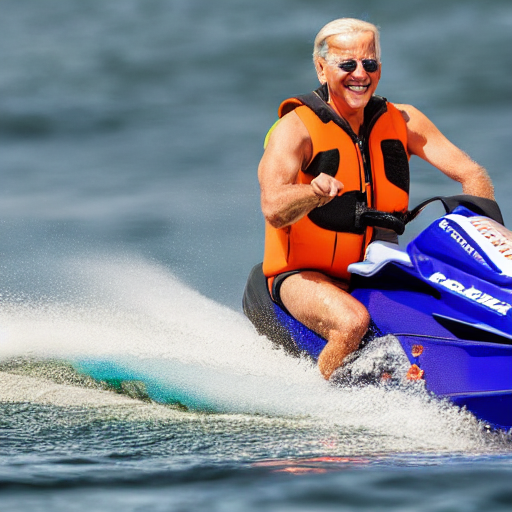

In [ ]:
display(image)

In [ ]:
# Delete model and clear up memory
del pipe

gc.collect()
torch.cuda.empty_cache()

## Generating High Fidelity Images with Stable Diffusion XL (SDXL)

Since the initial release of Stable Diffusion 1.4 in 2020, there have been multiple releases from Stability AI in this series of models.

Here, we will work with Stable Diffusion XL (SDXL) - this model is much larger than the original, and is actually a set of two seperate models or an *ensemble*: a base model for generating the initial image, then a second refiner model which takes the generated image (or a latent representation thereof) as input.

## Base

First, let's try using the base model only to generate an initial image. Here we will a [smaller variational autoencoder](https://huggingface.co/madebyollin/taesdxl) than the standard, and also generate smaller images (as opposed to the 1024x1024 default) given we are in a RAM constrained environment.

In [ ]:
from diffusers import AutoencoderTiny, DiffusionPipeline
import torch

# Instantiate the base model pipeline
base = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16",
)

# Use a tiny distilled version of the Variational Autoencoder, as we are in a low memory environment
base.vae = AutoencoderTiny.from_pretrained("madebyollin/taesdxl", torch_dtype=torch.float16)

# Use GPU
base.to("cuda")

# Generate the image
prompt = "A super high quality 4K image of Joe Biden riding a jetski over a sea of Fanta"
output = base(prompt=prompt)
image = output.images[0]

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Keyword arguments {'height': 512, 'width': 512} are not expected by StableDiffusionXLPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/597 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/9.79M [00:00<?, ?B/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Let's take a look at the initial base image:

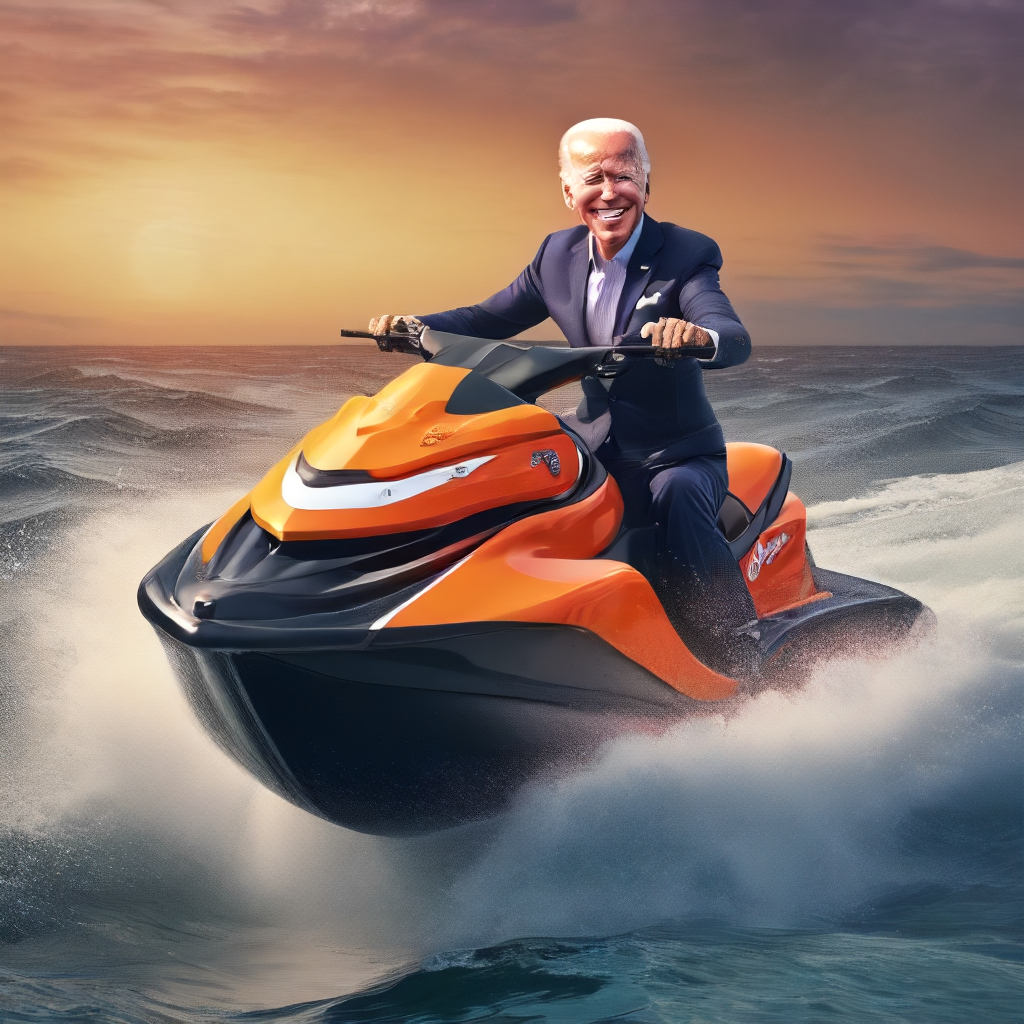

In [ ]:
display(image)

Before moving onto the next section to use the refiner model, we will again clear up memory.

We'll save the base text encoder and VAE for use in the refiner model, as these should be the same:

In [ ]:
base_te = base.text_encoder_2
base_vae = base.vae

del base

# Clear cache and free up RAM
gc.collect()
torch.cuda.empty_cache()

# Refiner


Now that we have the base model generated, we can pass this into the refiner model to denoise the image and make it crisper.

The code is largely the same using a pipeline, only with the refiner model and pieces passed along from the base model:

In [ ]:
refiner = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    text_encoder_2=base_te,
    vae=base_vae,
    torch_dtype=torch.float16,
    variant="fp16"
)

refiner.to("cuda")

refined_image = refiner(prompt=prompt, image=image).images[0]

model_index.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/4.52G [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.71k [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Now let's look at the refined version of the image:

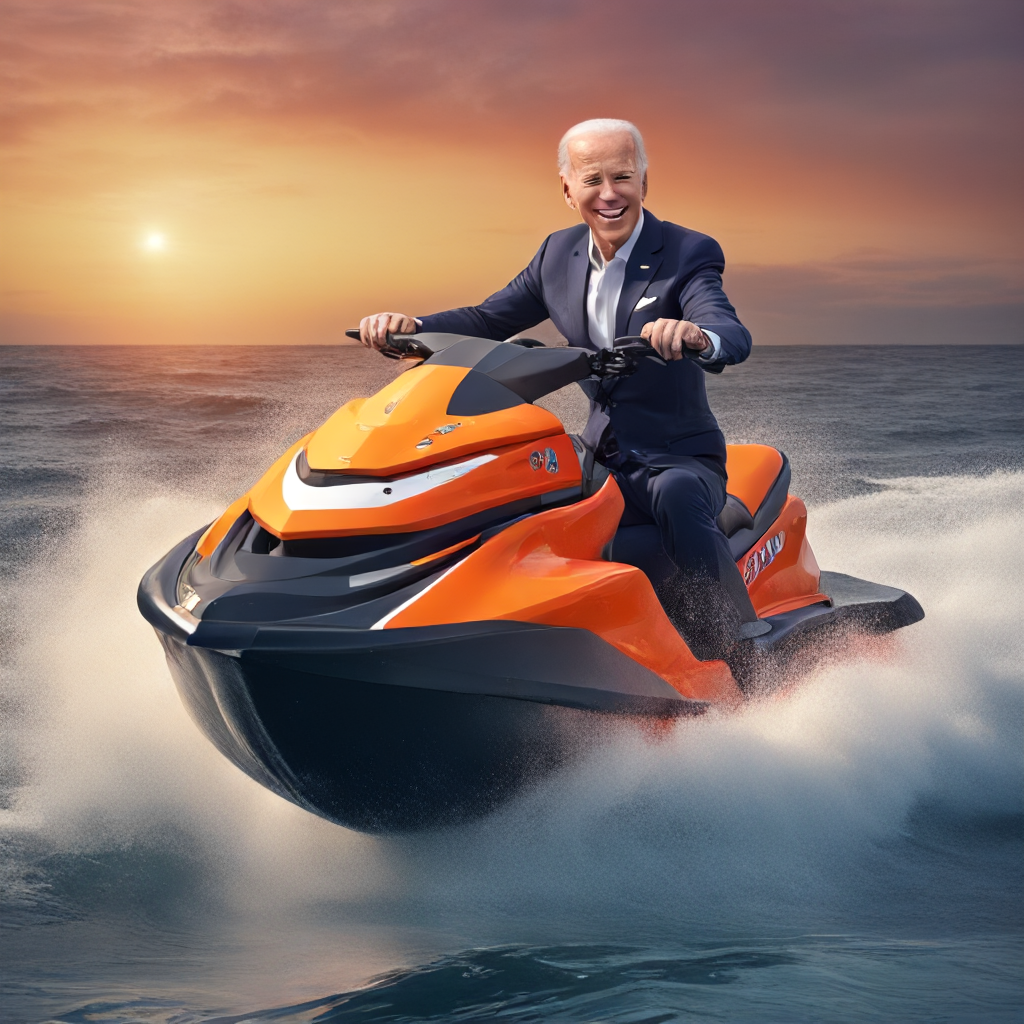

In [ ]:
refined_image

Now let's compare the two images side-by-side, and see the effect the refiner model has on the base image:

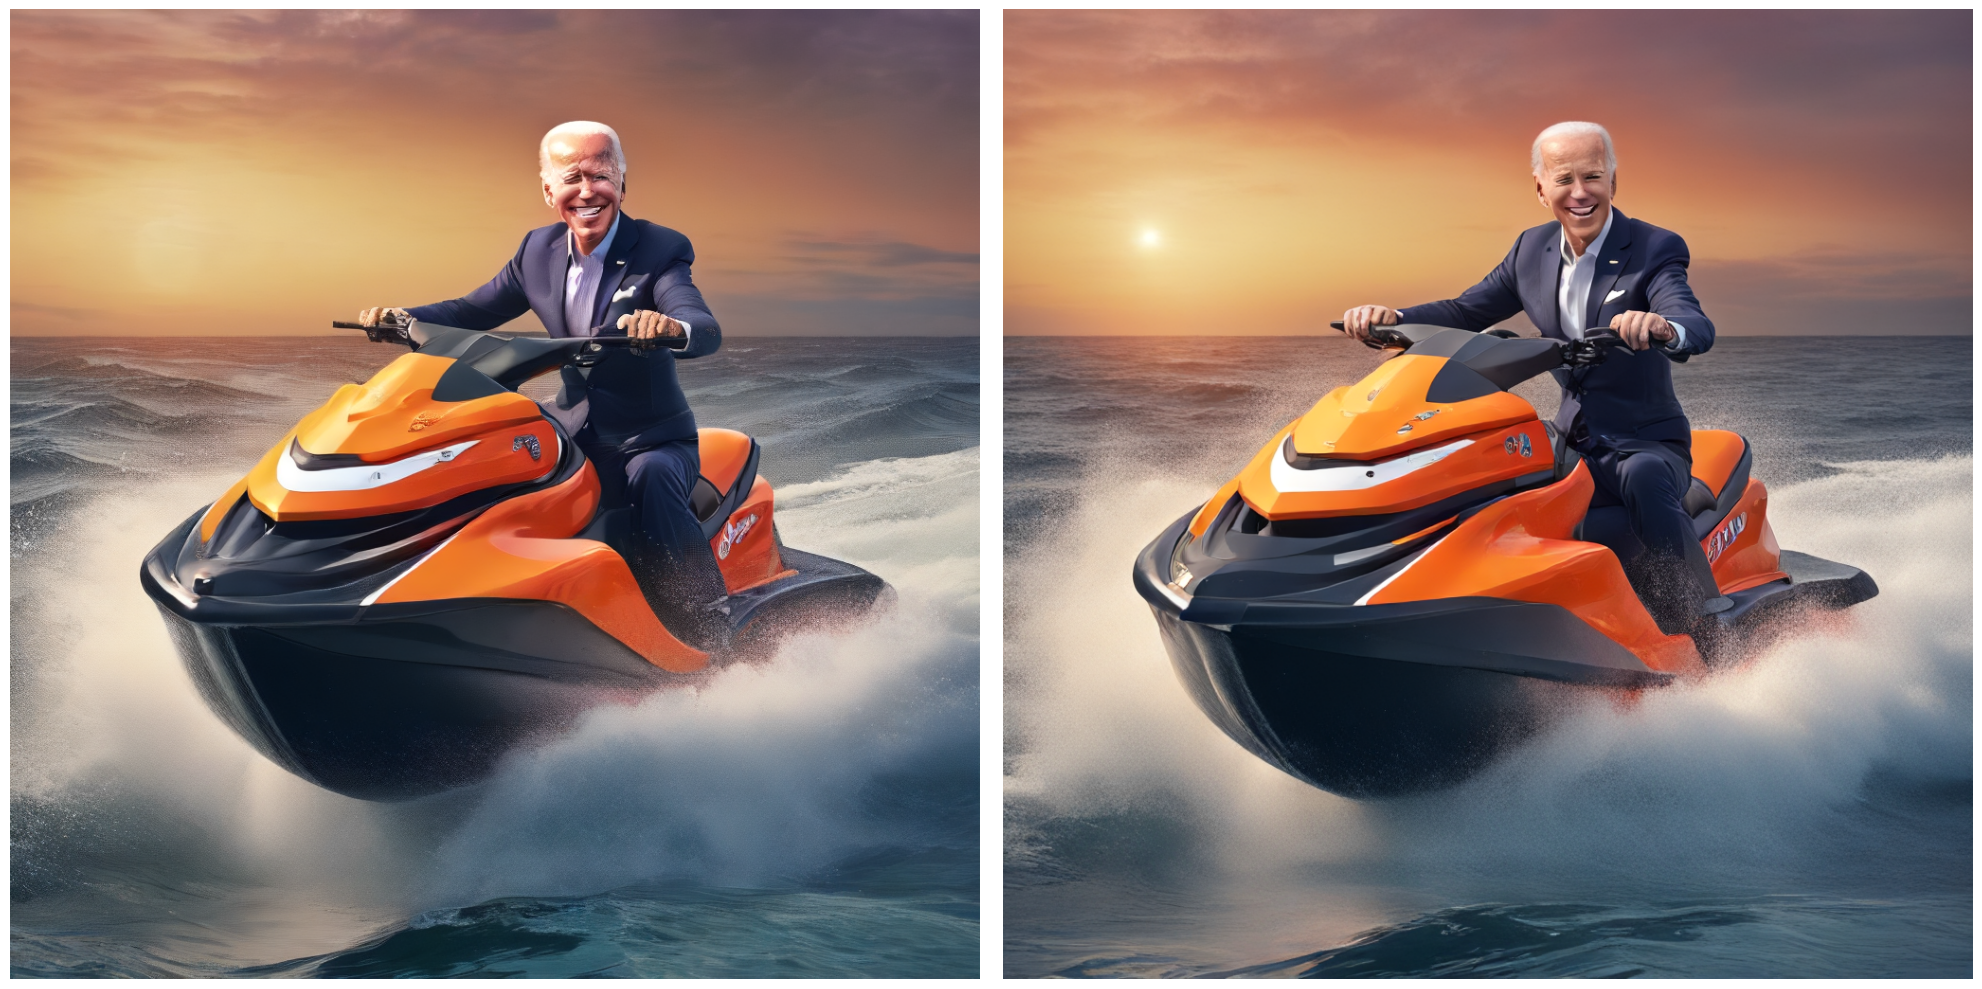

In [ ]:
import matplotlib.pyplot as plt

plt.subplots(1,2, figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(image)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(refined_image)
plt.axis('off')
plt.tight_layout()

In memory-reduced environments, the results are limited. However with more powerful compute, SDXL can generate very detailed images up to 1024x1024, such as the ones below, and more advanced tasks such as [in-painting](https://huggingface.co/docs/diffusers/en/using-diffusers/sdxl#inpainting) or generating more specific outputs using other models like Controlnet, Dreambooth, or adapters.

<img src="https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0/resolve/main/01.png"/>

You can see it in action at the Hugging Face space backed by TPU from Google here: https://huggingface.co/spaces/google/sdxl

There is also [SDXL Lightning](https://huggingface.co/ByteDance/SDXL-Lightning), which is a model from ByteDance based upon SDXL, and generates images even faster than the original model.

In [ ]:
# Clean up
del refiner

# Clear cache and free up RAM
gc.collect()
torch.cuda.empty_cache()

## Exercise: Generating images with SD1.4

Experiment with the `num_inference_steps` parameter when generating images with the Diffusion pipeline. Try different values: from 1 to 10, 20, and 50.

What effect does this have on the results? On the computation time?

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

# Use GPU
pipe.to("cuda")

In [ ]:
# Use the same random seed to always get the same image
generator = torch.Generator("cuda").manual_seed(1337)

prompt = "An astronaut riding a horse"

#### CODE YOU ANSWER HERE


## Conclusion 🏁

That concludes the workshop. I hope you've learned a lot about the large language model landscape and what is possible with the tools available to us today, and only a few lines of code here or there.

Be sure to check out further opportunities for learning at the [official github repo](https://github.com/nlpfromscratch/) or the official [NLP from scratch website](https://www.nlpfromscratch.com).

Thanks for coming!

----

<table border="0" bgcolor="white">
  <tr></tr>
  <tr>
      <th align="left" style="align:left; vertical-align: bottom;"><p>Copyright NLP from scratch, 2024.</p></th>
      <th aligh="right" width="33%"><a href="https://www.nlpfromscratch.com?utm_source=notebook&utm_medium=nb-footer-img"><img src="https://github.com/nlpfromscratch/webinars/blob/main/assets/banner.png?raw=1"></th>
</tr>
</table>